In [3]:
import os
os.environ['USE_PYGEOS'] = '0'
path_root = os.getcwd()
import numpy as np
#import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import ListedColormap
from pathlib import Path

os.chdir('../py/')
from plot.results import roebber_diagram
os.chdir(path_root)

In [4]:
import pandas as pd

In [5]:
# Set the default text font size
plt.rc('font', size=15)
# Set the axes title font size
plt.rc('axes', titlesize=16)
# Set the axes labels font size
plt.rc('axes', labelsize=15)
# Set the font size for x tick labels
plt.rc('xtick', labelsize=13)
# Set the font size for y tick labels
plt.rc('ytick', labelsize=13)
# Set the legend font size
plt.rc('legend', fontsize=13)
# Set the font size of the figure title
plt.rc('figure', titlesize=17)

In [6]:
def CSI(precision, recall):
    
    return (1 / precision + 1 / recall - 1)**-1

In [7]:
def Fscore(precision, recall, beta=1):
    
    return (1 + beta**2) * precision * recall / (beta**2 * precision + recall)

In [8]:
def precision(fscore, recall, beta):
    
    return fscore * beta / (beta**2 * f - (1 + beta**2) * R)

In [9]:
def recall_f(fscore, precision, beta=1):
    
    return beta**2 * fscore * precision / ((1 + beta**2) * precision - fscore)

## Resultados

In [10]:
results = {'NWP': {'current': [.618, .413],
                   'COS': [.687, .387],
                   'DWD': [.522, .42],
                   'ENS': [.725, .416],
                   'HRES': [.612, .416]},
            'COMB': {'ENS': [.725, .416],
                     '1D+1P': [.643, .455],
                     'MM': [.7, .424],
                     'MW': [.692, .455],
                     'BW': [.7, .451]}}

In [11]:
results = {'NWP': {'current': np.array([[.735, .618, .612, .625], [.522, .413, .215, .120]]),
                   'COS': np.array([[.718, .687], [.673, .387]]),
                   'DWD': np.array([[.583, .522, .358], [.585, .42, .291]]),
                   'ENS': np.array([[.711, .725, .605, .396], [.681, .416, .264, .287]]),
                   'HRES': np.array([[.671, .612, .429, .336], [.580, .416, .273, .244]]),
                   },
            'COMB': {'ENS': np.array([[.711, .725, .605, .396], [.681, .416, .264, .287]]),
                     '1D+1P': np.array([[.717, .643, .599, .414], [.662, .455, .262, .256]]),
                     'MM': np.array([[.838, .7, .412, .334], [.628, .424, .276, .252]]),
                     'MW': np.array([[.718, .692, .579, .402], [.673, .455, .271, .278]]),
                     'BW': np.array([[.829, .7, .586, .445], [.620, .451, .268, .255]])}}

### Roebber diagram

In [12]:
top = cm.get_cmap('Blues_r', 128)
bottom = cm.get_cmap('Oranges', 128)
newcolors = np.vstack((top(np.linspace(0.2, .95, 128)),
                       bottom(np.linspace(.05, .8, 128))))
BuOr = ListedColormap(newcolors, name='BlueOrange')

### NWP

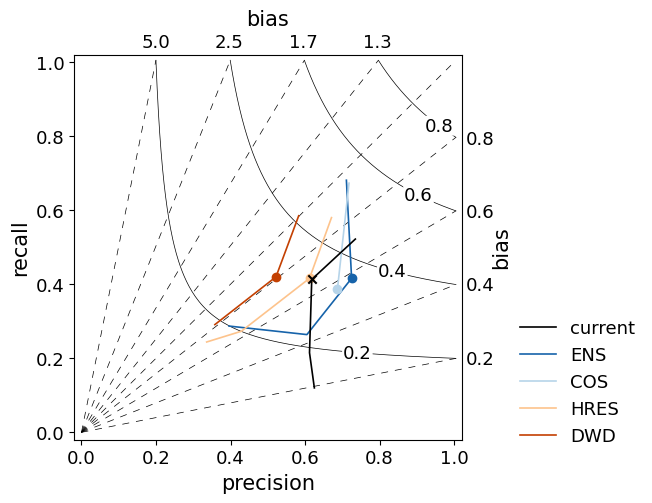

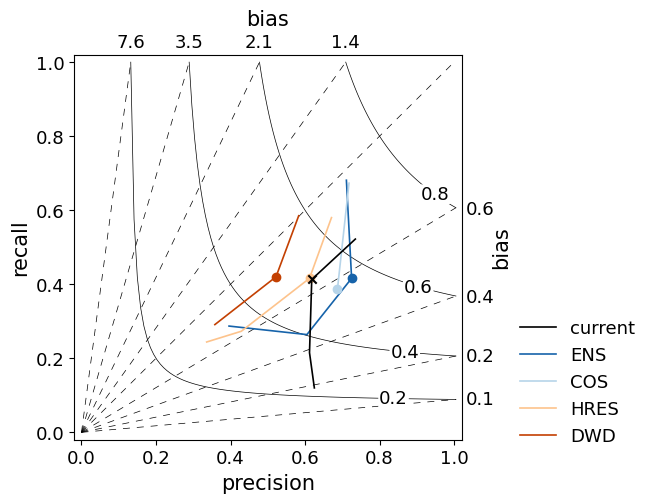

In [14]:
exp = 'NWP'
lw = 1.2

cmap = BuOr
colors = ListedColormap(cmap(np.linspace(0, 1, 4))).colors

for metric in ['CSI', 'fscore']:

    fig, ax = roebber_diagram(metric=metric, beta=.8)

    # benchmark
    ax.plot(*results[exp]['current'], c='k', lw=lw, label='current', zorder=10)
    ax.scatter(*results[exp]['current'][:,1], marker='x', c='k', zorder=10)
    

    # NWP
    for key, color in zip(['ENS', 'COS', 'HRES', 'DWD'], colors):
        ax.plot(*results[exp][key], color=color, lw=lw, label=key)
        ax.scatter(*results[exp][key][:,1], marker='o', color=color, zorder=9)

    fig.legend(frameon=False, bbox_to_anchor=[1.08, .05, .2, .333])

    # plt.savefig(f'../results/skill/2020_2023/{exp}/12_60_144_180/window_1/kge_0.5/roebber_{exp}_{metric}_60h.pdf',
    #             dpi=300, bbox_inches='tight');

### COMB 

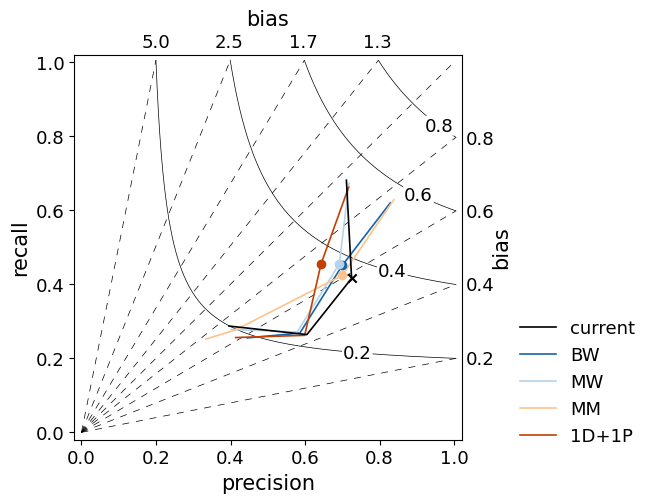

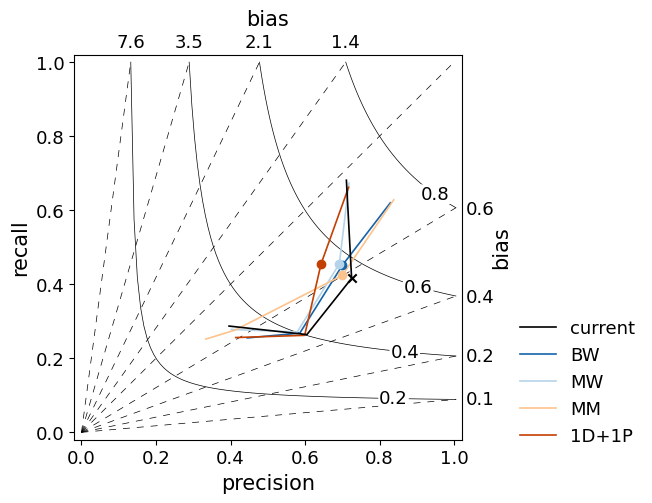

In [15]:
exp = 'COMB'

cmap = BuOr
colors = ListedColormap(cmap(np.linspace(0, 1, 4))).colors

for metric in ['CSI', 'fscore']:

    fig, ax = roebber_diagram(metric=metric, beta=.8)
        
    # benchmark
    ax.plot(*results[exp]['ENS'], c='k', lw=lw, label='current', zorder=10)
    ax.scatter(*results[exp]['ENS'][:,1], marker='x', c='k', zorder=10)
    
    # NWP
    for key, color in zip(['BW', 'MW', 'MM', '1D+1P'], colors):
        ax.plot(*results[exp][key], color=color, lw=lw, label=key)
        ax.scatter(*results[exp][key][:,1], marker='o', color=color, zorder=9)

    fig.legend(frameon=False, bbox_to_anchor=[1.08, .05, .2, .333])

    # plt.savefig(f'../results/skill/2020_2023/combination/12_60_144_180/window_1/kge_0.5/roebber_{exp}_{metric}_60h.pdf',
    #             dpi=300, bbox_inches='tight');

In [16]:
def PR_CSI(CSI: float) -> tuple[np.ndarray, np.ndarray]:
    """Given a value of CSI (critical success index), it returns all possible pairs of values of precision and recall that correspond to that CSI
    
    Input:
    ------
    CSI: float
        Value of the critical success index
    Output:
    -------
    precision: np.ndarray
        Array of precision values
    recall: np.ndarray
        Array of recall values
    """
    
    assert 0 <= CSI <= 1, '"CSI" must be a value between 0 and 1'
    
    e = .005
    Pmin = 2 * CSI / (1 + CSI)
    P = np.linspace(Pmin, 1 + e, 100)
    R = CSI * P / (P - (1 - P) * CSI)
    
    return np.concatenate((R[::-1], P)), np.concatenate((P[::-1], R))



def PR_fscore(fscore: float, beta: float = 1) -> tuple[np.ndarray, np.ndarray]:
    """Given a value of the f-score, it returns all possible pairs of values of precision and recall that correspond to that f-score
    
    Input:
    ------
    fscore: float
        Value of the fscore
    beta: float
        Coefficient that gives more weight to precision (beta < 0) or recall (beta > 0) in the computation of the f-score
    Output:
    -------
    P: np.ndarray
        Array of precision values
    R: np.ndarray
        Array of recall values
    """
    
    assert 0 <= fscore <= 1, '"CSI" must be a value between 0 and 1'
    assert beta > 0, '"beta" must be a positive value.'
    
    e = .005
    Pmin = fscore / (1 + beta**2 * (1 - fscore))
    P = np.linspace(Pmin, 1 + e, 100)
    R = beta**2 * fscore * P / ((1 + beta**2) * P - fscore)
    
    return P, R

In [17]:
def roebber_diagram(metric: str = 'CSI', beta: float = 1, ax=None, **kwargs):
    """It creates the figure of the Roebber diagram. This diagram shows in a single plot the precision and recall values (X and Y axis), the bias and the specified metric (background lines).
    
    Inputs:
    -------
    metric: str
        Metric that will be shown in the background of the diagram. Either "CSI" (critical success index) or "fscore"
    beta: float
        If the metric is the f-score, coefficient that weights precision in the computation of the f-score
    ax:
        Matplotlib axes where the diagram will be added. If not provided (default), a figure will be created
    """
    
    assert beta > 0, '"beta" must be a positive value.'
    assert metric in ['CSI', 'fscore'], '"metric" must be one of these values: "CSI" or "fscore"'
    
    figsize = kwargs.get('figsize', (5, 5))
    lw = kwargs.get('lw', .5)
    lim = kwargs.get('lim', (-.02, 1.02))
    dashes = kwargs.get('dashes', (10, 10))
    
    if ax is None:
        fig, ax = plt.subplots(figsize=figsize)
    fs = ax.get_xticklabels()[0].get_fontsize()
    ax.plot([0, 1], [0, 1], lw=lw, c='k', ls='--', dashes=dashes)

    metric_values = np.arange(.2, 1., .2)
    P = np.linspace(0, 1, 101)

    for value in metric_values:
        if metric == 'CSI':
            P, R = PR_CSI(CSI=value)
        elif metric == 'fscore':
            P, R = PR_fscore(fscore=value, beta=beta)
        ax.plot(P, R, lw=lw, c='k', ls='-', zorder=0)
        i = int(len(P) * .8)
        ax.text(P[i], R[i], f'{value:.1}', ha='center', va='center', fontsize=fs,
                bbox=dict(facecolor='white', edgecolor='none', boxstyle='round,pad=0.05'))#, backgroundcolor='w')
        for i in [0, -1]:
            ax.plot([0, P[i]], [0, R[i]], lw=lw, c='k', ls='--', dashes=dashes, zorder=0)
            bias = R[i] / P[i]
            if bias < 1:
                ax.text(lim[1] + .01, bias, f'{bias:.1f}', ha='left', va='center', fontsize=fs)
            if bias > 1:
                ax.text(1 / bias, lim[1] + .01, f'{bias:.1f}', ha='center', va='bottom', fontsize=fs)
        
    ax.set(xlim=(-.02, 1.02),
           xlabel='precision',
           ylim=(-.02, 1.02),
           ylabel='recall')
    ax.text(1.1, .5, 'bias', rotation=90, va='center')
    ax.text(.5, 1.1, 'bias', ha='center')
    
    if 'title' in kwargs:
        ax.text(.5, 1.125, kwargs['title'], ha='center', fontsize=12)
        
    return fig, ax 

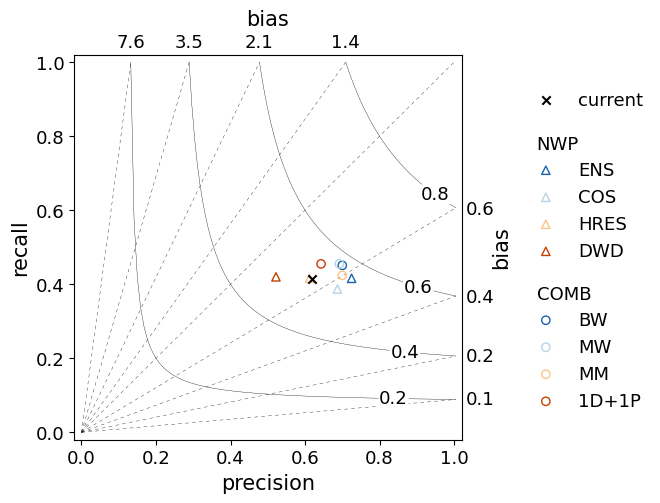

In [19]:

metric = 'fscore'
lw = 1.2

cmap = BuOr
colors = ListedColormap(cmap(np.linspace(0, 1, 4))).colors

fig, ax = roebber_diagram(metric=metric, beta=.8, lw=.25)

# benchmark
#ax.plot(*results[exp]['current'], c='k', lw=lw, label='current', zorder=10)
ax.scatter(*results['NWP']['current'][:,1], marker='x', c='k', label='current', zorder=10)
handles1, labels1 = ax.get_legend_handles_labels()

# NWP
exp = 'NWP'
for key, color in zip(['ENS', 'COS', 'HRES', 'DWD'], colors):
    #ax.plot(*results[exp][key], color=color, lw=lw, label=key)
    ax.scatter(*results[exp][key][:,1], marker='^', facecolors='none', edgecolors=color, label=key, zorder=9)
handles2, labels2 = ax.get_legend_handles_labels()
# ax.scatter(-1, -1, color='w', label=' ')

# COM
exp = 'COMB'
for key, color in zip(['BW', 'MW', 'MM', '1D+1P'], colors):
    #ax.plot(*results[exp][key], color=color, lw=lw, label=key)
    ax.scatter(*results[exp][key][:,1], marker='o', facecolors='none', edgecolors=color, label=key, zorder=9)
handles3, labels3 = ax.get_legend_handles_labels()

len2 = len(handles2)
handles3, labels3 = handles3[len2:], labels3[len2:]
len1 = len(handles1)
handles2, labels2 = handles2[len1:], labels2[len1:]
# handles3, labels3 = list(set(handles3).difference(handles2)), list(set(labels3).difference(labels2)) 
# handles2, labels2 = list(set(handles2).difference(handles1)), list(set(labels2).difference(labels1))

fig.legend(handles1, labels1, frameon=False, bbox_to_anchor=[1., .0, .15, .84], loc=2)
fig.text(1.05, .72, 'NWP', ha='left', va='top', fontsize=13)
fig.legend(handles2, labels2, frameon=False, bbox_to_anchor=[1., .0, .15, .7], loc=2)
fig.text(1.05, .42, 'COMB', ha='left', va='top', fontsize=13)
fig.legend(handles3, labels3, frameon=False, bbox_to_anchor=[1, .0, .15, .4], loc=2);

plt.savefig(f'../docs/paper/figures/roebber_{metric}_60h.pdf',
            dpi=300, bbox_inches='tight');